<a href="https://colab.research.google.com/github/ashok-arora/ML-Zoomcamp/blob/main/homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Zoomcamp Homework 2](#https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/02-regression/homework.md)

In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv

--2021-09-19 12:10:34--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7077973 (6.8M) [text/plain]
Saving to: ‘AB_NYC_2019.csv’

AB_NYC_2019.csv     100%[===================>]   6.75M  --.-KB/s    in 0.03s   

2021-09-19 12:10:35 (197 MB/s) - ‘AB_NYC_2019.csv’ saved [7077973/7077973]



In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('./AB_NYC_2019.csv')
print(df.columns)
df.head()

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df.price

0        149
1        225
2        150
3         89
4         80
        ... 
48890     70
48891     40
48892    115
48893     55
48894     90
Name: price, Length: 48895, dtype: int64

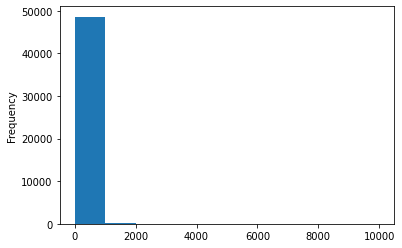

In [6]:
df.price.plot(kind='hist')

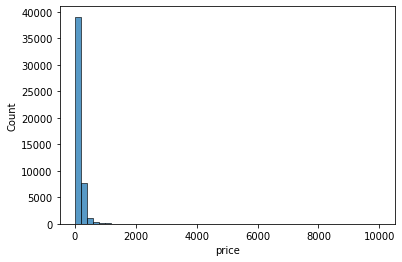

In [7]:
sns.histplot(df['price'], bins=50)

In [8]:
df = df[['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]

## Answer 1: Missing Values

In [9]:
df.isna().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## Answer 2: Median

In [10]:
df.minimum_nights.median()

3.0

In [11]:
# df = df.sample(frac=1, random_state=42)

## Answer 3: LR and filling NA

In [12]:
n = len(df)
n_train = int(n*0.6)
n_valid = int(n*0.2)
n_test = n - n_train - n_valid
print(n, n_train+n_valid+n_test)

48895 48895


In [13]:
df_train = df.iloc[:n_train]
df_valid = df.iloc[n_train:n_train+n_valid]
df_test = df[n_train+n_valid:]

In [14]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [15]:
df_train = df.iloc[idx[:n_train]]
df_valid = df.iloc[idx[n_train:n_train+n_valid]]
df_test = df.iloc[idx[n_train+n_valid:]]

In [16]:
df_train = df_train.reset_index(drop=True)
df_valid = df_valid.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [17]:
y_train = np.log1p(df_train.price.values)
y_valid = np.log1p(df_valid.price.values)
y_test = np.log1p(df_test.price.values)

In [18]:
del df_train['price']
del df_valid['price']
del df_test['price']

In [19]:
df_train.dtypes

latitude                          float64
longitude                         float64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [20]:
def train_linear_regression(X, y):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])

  XTX = X.T.dot(X)
  XTX_inv = np.linalg.inv(XTX)
  w = XTX_inv.dot(X.T).dot(y)

  return w[0], w[1:]

In [21]:
def rmse(y, y_pred):
  error = y_pred - y
  mse = (error ** 2).mean()
  return np.sqrt(mse)


### Fill NA with 0

In [22]:
def prepare_X(df):
  df = df.fillna(0)
  X = df.values
  return X

In [23]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [24]:
y_pred = w_0 + X_train.dot(w)

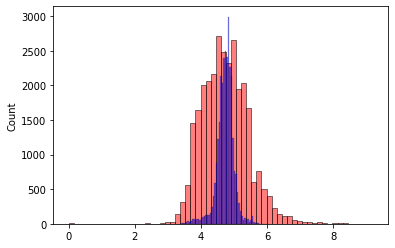

In [25]:
sns.histplot(y_train, label='target', color='red', alpha=0.5, bins=60)
sns.histplot(y_pred, label='prediction', color='blue', alpha=0.5, bins=60)

In [26]:
round(rmse(y_train, y_pred), 2)

0.64

### Check that missing value still present in original

In [27]:
df.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### Fill NA with mean

In [28]:
def prepare_X(df):
  df = df.fillna(df.reviews_per_month.mean())
  X = df.values
  return X

In [29]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [30]:
y_pred = w_0 + X_train.dot(w)

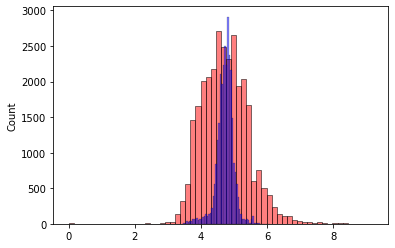

In [31]:
sns.histplot(y_train, label='target', color='red', alpha=0.5, bins=60)
sns.histplot(y_pred, label='prediction', color='blue', alpha=0.5, bins=60)

In [32]:
round(rmse(y_train, y_pred), 2)

0.64

## Answer 4: Regularised LR

In [33]:
def train_linear_regression_reg(X, y, r=0.01):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])

  XTX = X.T.dot(X)
  XTX = XTX + r * np.eye(XTX.shape[0])

  XTX_inv = np.linalg.inv(XTX)
  w = XTX_inv.dot(X.T).dot(y)

  return w[0], w[1:]

In [34]:
def prepare_X(df):
  df = df.fillna(0)
  X = df.values
  return X

In [35]:
X_train = prepare_X(df_train)
X_valid = prepare_X(df_valid)

for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
  w_0, w = train_linear_regression_reg(X_train, y_train, r)
  y_pred = w_0 + X_valid.dot(w)
  print('RMSE={} when r={}'.format(round(rmse(y_valid, y_pred), 2), r))

RMSE=0.64 when r=0
RMSE=0.64 when r=1e-06
RMSE=0.64 when r=0.0001
RMSE=0.64 when r=0.001
RMSE=0.66 when r=0.01
RMSE=0.68 when r=0.1
RMSE=0.68 when r=1
RMSE=0.68 when r=5
RMSE=0.68 when r=10


## Answer 5: STD of RMSE

In [36]:
def prepare_X(df):
  df = df.fillna(0)
  X = df.values
  return X

In [37]:
n = len(df)
idx = np.arange(n)

rmses = []

for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
  n_train = int(n*0.6)
  n_valid = int(n*0.2)
  n_test = n - n_train - n_valid
  print(s, n, n_train+n_valid+n_test)
  
  np.random.seed(s)

  np.random.shuffle(idx)

  df_train = df.iloc[idx[:n_train]].reset_index(drop=True)
  df_valid = df.iloc[idx[n_train:n_train+n_valid]].reset_index(drop=True)
  df_test = df.iloc[idx[n_train+n_valid:]].reset_index(drop=True)

  y_train = np.log1p(df_train.price.values)
  y_valid = np.log1p(df_valid.price.values)
  y_test = np.log1p(df_test.price.values)

  del df_train['price']
  del df_valid['price']
  del df_test['price']

  X_train = prepare_X(df_train)
  w_0, w = train_linear_regression(X_train, y_train)

  X_valid = prepare_X(df_valid)
  y_pred = w_0 + X_valid.dot(w)

  rmses.append(round(rmse(y_valid, y_pred), 2))

0 48895 48895
1 48895 48895
2 48895 48895
3 48895 48895
4 48895 48895
5 48895 48895
6 48895 48895
7 48895 48895
8 48895 48895
9 48895 48895


In [38]:
np.std(rmses)

0.0050000000000000044

## Answer 6: RMSE on Test

In [39]:
n = len(df)
n_train = int(n*0.6)
n_test = n - n_train
print(n, n_train+n_test)

48895 48895


In [40]:
df_train = df.iloc[:n_train]
df_test = df[n_train:]

In [41]:
def prepare_X(df):
  df = df.fillna(0)
  X = df.values
  return X

In [42]:
idx = np.arange(n)

np.random.seed(seed=9)

np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]].reset_index(drop=True)
df_test = df.iloc[idx[n_train:]].reset_index(drop=True)

y_train = np.log1p(df_train.price.values)
y_test = np.log1p(df_test.price.values)

del df_train['price']
del df_test['price']

X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, 0.001)
y_pred = w_0 + X_train.dot(w)

print(round(rmse(y_train, y_pred), 2))

0.65
